# 1_Initialization

In [1]:
from safedigital import mechanical as ME  # import mechanical module
from datetime import datetime
from datetime import timedelta
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

# from MRC.sswgmm_mech import mech_monitor as mm
sns.set(color_codes=True)
cur_directory = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
dir_data_washed = (cur_directory + '\\' + 
                  '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                  + '1_Data formatted')
dir_data_raw = (cur_directory + '\\' +
                '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '0_Data original')
dir_noreclosing_washed = (cur_directory + '\\' + 
                  '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\'
                  + '3_Data no reclosing' + '\\' + 'washed')
dir_noreclosing_raw = (cur_directory + '\\' +
                '20221122_ME_SA12kV_SGCC_VVV_V1_Life_Test_0_10000' + '\\' +
                '3_Data no reclosing' + '\\' + 'raw')


# 2_Data washing
## 2.1_Data re-orgnization
### 2.1.1_All files 
Save every curve into one .csv file

In [ ]:
# for all data, split and save each curve into one single .csv file
travel_path_list = []
wave_class_dict = {'角度(合闸).txt':'travel_close', '角度(分闸).txt':'travel_open', 
                   '合闸电流(合闸).txt':'current_close', '分闸电流(分闸).txt':'current_open', 
                   '储能电流(储能).txt':'current_motor'}
for cur_dir, dirs, files in os.walk(dir_data_raw):
    print(cur_dir)
    for wave_class in wave_class_dict.keys():
        if wave_class in files:            
            wave_path = os.path.join(cur_dir, wave_class)
            # print(travel_path)
            travel_path_list.append(wave_path)
            with open(wave_path, "r", encoding='utf-8') as f: 
                data = f.read()
            wave_list = data.split("WaveID:")
            # since the 1st element is blank, wave data splitting from 2nd element
            for wave_str in wave_list[1:]:
                # extract timestamp to be name of waveform file
                time_stamp_start_idx = wave_str.find('Waveform time:') + len('Waveform time:')
                time_stamp_end_idx = wave_str.find(';Sampling frequency(ms)')
                time_stamp_str = wave_str[time_stamp_start_idx : time_stamp_end_idx]
                
                # change format of time stamp into 'XX_XX_XX'
                time_stamp_num = time_stamp_str.replace(' ', '_')
                time_stamp_num = time_stamp_num.replace(':', '_')
                time_stamp_num = time_stamp_num.replace('-', '_')
                
                # extract waveform data
                wave_data_start_idx = wave_str.find('Waveform data:') + len('Waveform data:')
                wave_data_str = wave_str[wave_data_start_idx:]
                wave_data_df = pd.DataFrame({'data':wave_data_str.split(',')})
                
                # export data into .csv file
                wave_file_name = time_stamp_num + '_' + wave_class_dict[wave_class]
                wave_data_df.to_csv(dir_data_washed + '\\' + wave_file_name + '.csv')
                    
                    
            else:
                pass
    else:
        pass
print(travel_path_list)


### 2.1.2_Files without reclosing

In [ ]:
ME.DataClean.mconfig_to_csv(dir_noreclosing_raw, dir_noreclosing_washed)

## 2.2_Data preview
### 2.2.1_Travel open
#### total plot

In [ ]:
count_travel_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_open' in file:
            count_travel_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('open travel curves, total number: {}'.format(count_travel_open))
print('number of open trave curves:', count_travel_open)
         

#### plot every 2k

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'travel_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.2_Travel close
#### total plot

In [ ]:
count_travel_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'travel_close' in file:
            count_travel_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
plt.title('close travel curves, total number: {}'.format(count_travel_close))
print('number of close trave curves:', count_travel_close) 

#### plot every 2K

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'travel_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                 
                                )  

### 2.2.3_Current_open
#### total plot

In [ ]:
count_current_open = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot open travel curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_open' in file:
            count_current_open += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            if np.mean(curve_df['data']) >= 50:
                print('invalid curve file name:', file)
plt.title('open coil current curves, total number: {}'.format(count_current_open))
print('number of open coil current curves:', count_current_open)           

#### plot every 2k

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'current_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

#### invalid curve plot

In [ ]:
file = '2022_11_24_11_47_9_257_current_open.csv'
curve_df_test = pd.read_csv(os.path.join(cur_dir, file), header=0)
plt.plot(curve_df_test['data'],
         c='g',
         linewidth=0.5)

### 2.2.4_Current_close
#### total plot

In [ ]:
count_current_close = 0
for cur_dir, dirs, files in os.walk(dir_data_washed):
    
    # plot close coil current curve
    plt.figure(dpi=200)
    for file in files:

        if 'current_close' in file:
            count_current_close += 1
            curve_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            plt.plot(curve_df['data'],
                     c='g',
                     linewidth=0.5)
            # if np.mean(curve_df['data']) >= 50:
            #     print('invalid curve file name:', file)
plt.title('close coil current curves, total number: {}'.format(count_current_close))
print('number of close coil current curves:', count_current_close)           

#### plot every 2k

In [ ]:
ME.MechOperMconfig.plot_every_2k(dir_data_washed, 
                                 'current_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.5_Travel open without reclosing

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'travel_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.6_Travel close without reclosing

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'travel_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'travel_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.7_Current open without reclosing 

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_open')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'current_open',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

### 2.2.8_Current close without reclosing 

In [ ]:
ME.MechOperMconfig.plot_all_csv(dir_noreclosing_washed, 'current_close')
ME.MechOperMconfig.plot_every_2k(dir_noreclosing_washed, 
                                 'current_close',
                                 date_time_2k = datetime(2022,11,24),
                                 date_time_4k = datetime(2022,11,28),
                                 date_time_6k = datetime(2022,12,12),
                                 date_time_8k = datetime(2022,12,14),
                                 date_time_10k = datetime(2022,12,16),
                                )  

# 3_Parameter calculation
## 3.1_Travel

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
travel            0.70    47.41   48.74   49.19   47.89   47.84   46.43   2.75    65.00   35.00   


C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\01_Code\lib\safedigital\mechanical.py:421: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=50, kde=True, ax=axs22, vertical=True, fit=stats.norm)


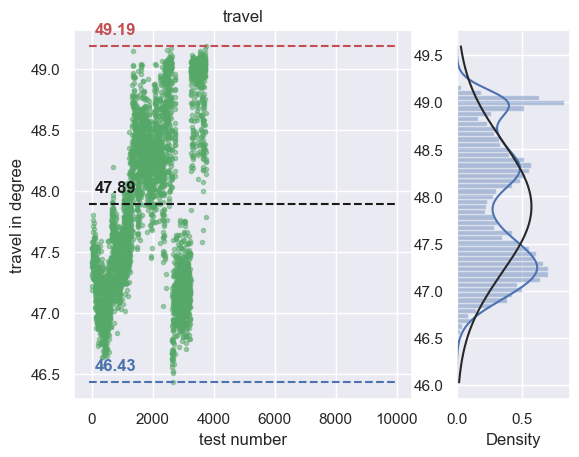

In [2]:
travel_list = []
for cur_dir, dirs, files in os.walk(dir_noreclosing_washed):
    for file in files:
        if 'travel_open' or 'travel close' in file:
            angle_df = pd.read_csv(os.path.join(cur_dir, file), header=0)
            # print(angle_df.columns)
            angle_arr = np.array(angle_df['data'])
            # print(angle_arr.shape)
            head = np.mean(angle_arr[:50])
            tail = np.mean(angle_arr[-50:])
            # print(head,tail)
            travel, angle_open, angle_close  = ME.MechOperMconfig.cal_travel(head=head, tail=tail)
            travel_list.append(travel)
travel_arr = np.array(travel_list)
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std', 
                                                                        'start', 'end', 
                                                                        'max', 'mean', 
                                                                        'median', 'min', 
                                                                        'span', 'alm_u', 
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(travel_arr, 
                                  title='travel', 
                                  ylabel='travel in degree')
